# Univariate Analysis

## Measures of central tendency

### Mean and Median of numerical series

#### We are going to be exploring the Video Game Sales dataset for this session

In [236]:
import os
import pandas as pd
import numpy as np

In [237]:
os.chdir("/Users/hridul.gupta/Desktop/Maverick AI Repo/machine-learning-training/Univariate Analysis/")
os.getcwd()

'/Users/hridul.gupta/Desktop/Maverick AI Repo/machine-learning-training/Univariate Analysis'

In [238]:
game_data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

#### High level details about the dataset

In [239]:
game_data.shape

(16719, 16)

In [240]:
game_data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [241]:
print ("Unique values :  \n\n",game_data.nunique())

Unique values :  

 Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64


In [242]:
game_data.sample(1000).head()

Name Platform  Year_of_Release  \
5094                       Trivial Pursuit     X360           2009.0   
3558                        Arena Football      PS2           2006.0   
216    Super Smash Bros. for Wii U and 3DS     WiiU           2014.0   
3028             Pro Pinball: Big Race USA       PS           1999.0   
14475            Darkstalkers Resurrection      PS3           2013.0   

            Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
5094         Misc       Electronic Arts      0.12      0.21      0.00   
3558       Sports       Electronic Arts      0.28      0.22      0.00   
216      Fighting              Nintendo      2.60      1.08      0.81   
3028   Simulation  Take-Two Interactive      0.37      0.25      0.00   
14475    Fighting                Capcom      0.00      0.00      0.03   

       Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  \
5094          0.04          0.37          66.0          19.0        6.4   
3558          0.07          0.56          66.0          18.0        8.6   
216           0.38          4.87           NaN           NaN        NaN   
3028          0.04          0.66          69.0           4.0        tbd   
14475         0.00          0.03          80.0          33.0        7.3   

       User_Count             Developer Rating  
5094          9.0       EA Bright Light      E  
3558         14.0            EA Tiburon   E10+  
216           NaN                   NaN    NaN  
3028          NaN  Cunning Developments      E  
14475        27.0   Iron Galaxy Studios      T

#### There appears to be some missing values in the numerical columns. We will be excluding them (NaN values).

### Let's look at mean and median values for sales in North America

In [243]:
game_data["NA_Sales"].mean()

0.2633303427238687

In [244]:
game_data["NA_Sales"].median()

0.08

#### Mean >>> Median! What does this tell about the NA_Sales variable?

In [245]:
from matplotlib import pyplot
import numpy as np

x = game_data["NA_Sales"]

bins = np.linspace(0, 3, 100)
pyplot.hist(x, bins, label='NA Sales')
pyplot.legend(loc='upper right')
pyplot.show()


#### Mean is greater than median whenever there is a positive skew. The mean inflates due to presence of high valued outliers

### Let's look at mean and median values for Critic_Score

In [246]:
game_data["Critic_Score"].mean()

68.96767850559173

In [247]:
game_data["Critic_Score"].median()

71.0

##### Mean < Median

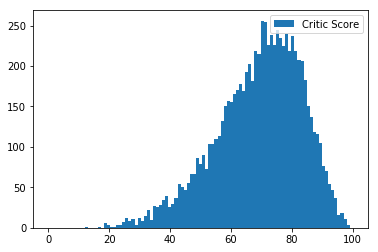

In [248]:
x = game_data["Critic_Score"]

bins = np.linspace(0, 100, 100)
pyplot.hist(x, bins, label='Critic Score')
pyplot.legend(loc='upper right')
pyplot.show()


#### This is a case of Negative Skew, where there is a long tail towards the lower end of values. The mean deflates because of the low values present

#### If we remove some of the values from the lower end then the mean and median will come very close

In [ ]:
game_data["Critic_Score"][game_data["Critic_Score"]>40].mean()

In [ ]:
game_data["Critic_Score"][game_data["Critic_Score"]>40].median()

## Percentiles

### Let's understand the percentile distribution of Critic_Score variable

In [249]:
Critic_Score = game_data["Critic_Score"].dropna()

In [250]:
len(Critic_Score)

8137

In [251]:
quantile_value = Critic_Score.quantile(0.2)
quantile_value

58.0

In [252]:
Critic_Score[Critic_Score >= quantile_value].count()

6532

In [253]:
Critic_Score[Critic_Score >= quantile_value].count()/len(Critic_Score)

0.802752857318422

#### 20% of data volume has Critic Score less than the 20th percentile value

## Quartiles

In [254]:
Critic_Score_quantiles = Critic_Score.quantile([0.25,0.5,0.75])
Critic_Score_quantiles

0.25    60.0
0.50    71.0
0.75    79.0
Name: Critic_Score, dtype: float64

In [255]:
print(Critic_Score.between(0,60).sum())
print(Critic_Score.between(60,71).sum())
print(Critic_Score.between(71,79).sum())
print(Critic_Score.between(79,100).sum())

2069
2359
2107
2230


In [260]:
bins = np.linspace(0, 100, 100)
pyplot.hist(Critic_Score, bins, label='Critic Score')
pyplot.legend(loc='upper right')
pyplot.axvline(x=60.0, color = 'black')
pyplot.axvline(x=71.0, color = 'black')
pyplot.axvline(x=79.0, color = 'black')
pyplot.axvline(x=Critic_Score.mean(), color = 'red')
pyplot.show()

### 5 number summary

In [261]:
Critic_Score.describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

### Box Plots

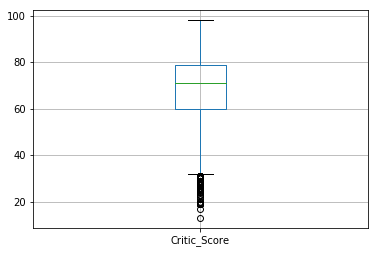

In [262]:
game_data.boxplot(column = ["Critic_Score"])

In [ ]:
game_data.boxplot(column = ["Critic_Score"], by = 'Rating')

### Range

In [263]:
print("Min   = ", game_data['Critic_Score'].min())
print("Max   = ", game_data['Critic_Score'].max())

print("Range = ", game_data['Critic_Score'].max() - game_data['Critic_Score'].min())

Min   =  13.0
Max   =  98.0
Range =  85.0


### Standard deviation

In [ ]:
game_data['Critic_Score'].std()

### Coefficient of variation

In [264]:
game_data['Critic_Count'].describe()

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64

In [265]:
game_data['User_Count'].describe()

count     7590.000000
mean       162.229908
std        561.282326
min          4.000000
25%         10.000000
50%         24.000000
75%         81.000000
max      10665.000000
Name: User_Count, dtype: float64

#### These two series have very different statistics for mean and std dev. But if we want to compare if the data in the two series are spread similarly, then we can use coefficient of variance

In [266]:
game_data['Critic_Count'].std()/game_data['Critic_Count'].mean()

0.7200266856935615

In [267]:
game_data['User_Count'].std()/game_data['User_Count'].mean()

3.4597956317118546

#### This indicates that the the critic counts are more closely distribtud around the mean, whereas the user counts have more variation and is spread further away from mean

In [268]:
import seaborn as sns

sns.distplot(game_data.Critic_Count.dropna())

In [ ]:
sns.distplot(game_data.Critic_Score.dropna())

### Can we convert Critic Count to a near normal distribution??

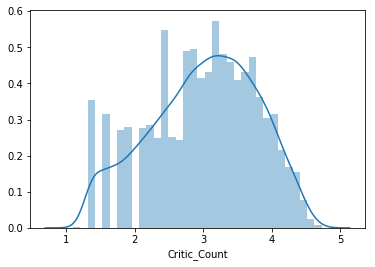

In [269]:
sns.distplot(np.log(game_data.Critic_Count.dropna()))

NameError: name 'log' is not defined